In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import shapely.geometry as shp
import pandas as pd
import math
import utm

Premier etape faire un circuit

Ref : *Spline_continuity.py* from PythonRobotics

In [89]:
class Track:
    

    def __init__(self, x: list, y: list):
        self.x = np.r_[x, x[0]] #close the track
        self.y = np.r_[y, y[0]]
        self.thickness = 2 # thinckness of the track
    
    """
    J'ai choisi de prendre cette interpolation mais on pourrais en prendre une autre si celle la ne nous plait pas
    Faire jouer le s
    """
    def interpolation(self):
        n = range(len(self.x))
        x_prep =  interpolate.splrep(n, self.x, s=2, per=True)
        y_prep =  interpolate.splrep(n, self.y, s=2, per=True)
        
        ipl_t = np.linspace(0.0, len(self.x) - 1, 10*len(self.x))
        
        x_smooth = interpolate.splev(ipl_t, x_prep)
        y_smooth = interpolate.splev(ipl_t, y_prep)
        self.x_smooth, self.y_smooth = x_smooth, y_smooth
        return(x_smooth, y_smooth)
        
    def poly_track(self): #transforme l'array en shape pour pouvoir faire des manipulation geometrique
        self.interpolation()
        return(shp.Polygon(zip(self.x_smooth, self.y_smooth)))
    
    def array_mid(self): # renvoie un array de la ligne mid apres interpolation
        return(np.array(self.poly_track().exterior))
    
    def array_left_corner(self): # renvoie un array de la ligne mid apres interpolation
        return(np.array(shp.Polygon(zip(self.x, self.y)).buffer(self.thickness/2).exterior))
    
    def array_right_corner(self): # renvoie un array de la ligne mid apres interpolation
        return(np.array(shp.Polygon(zip(self.x, self.y)).buffer(-self.thickness/2).exterior))
    
    def show_poly(self): # permet de show le track sans l'interpolation
        poly_track_nonsmooth = shp.Polygon(zip(self.x, self.y))
        poly_track_array = np.array(poly_track_nonsmooth.exterior)
        
        plt.plot(*poly_track_array.T,'r-')
        plt.plot(*poly_track_array.T,'k.',label="raw coords")
        
        plt.grid(True)
        plt.axis("equal")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
            
    def show_mid(self):
        poly_track_array = np.array(self.poly_track().exterior)
        
        plt.plot(*poly_track_array.T,'-r',label="mid")
        
        plt.grid(True)
        plt.axis("equal")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    def show_exter(self):
        poly_left_corner = shp.Polygon(zip(self.x, self.y)).buffer(self.thickness/2)  # Outward offset
        poly_right_corner = shp.Polygon(zip(self.x, self.y)).buffer(-self.thickness/2)  # Inward offset
        
        poly_left_corner_array = np.array(poly_left_corner.exterior)
        poly_right_corner_array = np.array(poly_right_corner.exterior)
        
        plt.plot(*poly_left_corner_array.T, '--.b', label="left blue")
        plt.plot(*poly_right_corner_array.T, '--.y', label="right yellow")
        
        plt.grid(True)
        plt.axis("equal")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    def show_interpol(self):
        poly_left_corner = shp.Polygon(zip(self.x, self.y)).buffer(self.thickness/2,cap_style=2,join_style=2)  # Outward offset
        poly_right_corner = shp.Polygon(zip(self.x, self.y)).buffer(-self.thickness/2,cap_style=2,join_style=2)  # Inward offset
        
        poly_track_array = np.array(self.poly_track().exterior)
        poly_left_corner_array = np.array(poly_left_corner.exterior)
        poly_right_corner_array = np.array(poly_right_corner.exterior)
        
        plt.plot(*poly_track_array.T,'-r', label="mid")
        plt.plot(*np.array(shp.Polygon(zip(self.x, self.y)).exterior).T,':.', label="mid poly",color="orange")
        
        plt.plot(*poly_left_corner_array.T, '--.b', label="left blue")
        plt.plot(*poly_right_corner_array.T, '--.y', label="right yellow")
        
        plt.grid(True)
        plt.axis("equal")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    def show_track(self, loop = True):
        poly_left_corner = shp.Polygon(zip(self.x, self.y)).buffer(self.thickness/2,cap_style=2,join_style=2)  # Outward offset
        poly_right_corner = shp.Polygon(zip(self.x, self.y)).buffer(-self.thickness/2,cap_style=2,join_style=2)  # Inward offset
        
        cond = len(self.x) if loop else -1
        
        poly_track_array = np.array(shp.Polygon(zip(self.x, self.y)).exterior)[:cond]
        poly_left_corner_array = np.array(poly_left_corner.exterior)[:cond]  # type: ignore
        poly_right_corner_array = np.array(poly_right_corner.exterior)[:cond] # type: ignore
        
        plt.plot(*poly_track_array.T,':.r', label="mid")
        
        plt.plot(*poly_left_corner_array.T, '--.b', label="left blue")
        plt.plot(*poly_right_corner_array.T, '--.y', label="right yellow")
        plt.grid(True)
        plt.axis("equal")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    def details(self):
        self.lenght = self.poly_track().length
        self.dist_moy = 
        

SyntaxError: invalid syntax (3058547632.py, line 125)

<bound method BaseGeometry.distance of <shapely.geometry.polygon.LinearRing object at 0x7f6c197c6b60>>

La longueure de la track est de 28.11 mètre


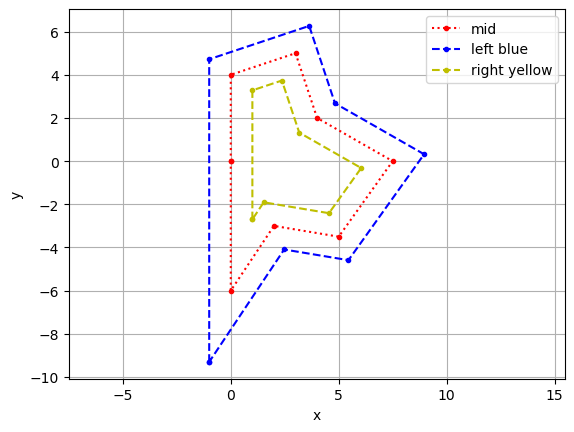

In [90]:
x = [0, 0, 2, 5.0, 7.5, 4.0, 3.0, 0]
y = [0, -6, -3, -3.5, 0.0, 2.0, 5.0, 4]

T1 = Track(x,y)
T1.details()
print("La longueure de la track est de {lenght:.2f} mètre".format(lenght = T1.lenght))
T1.show_track()
#

In [4]:
class Car:
    def __init__(self,x=0,y=0):
        self.x = x
        self.y = y
        
    def model(self):
        self.y = self.x
        

/home/leonj/anaconda3/envs/FormuleETS/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


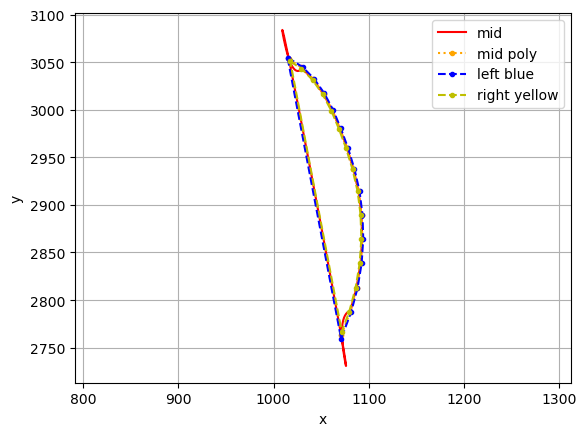

In [92]:
track_gps = pd.read_csv("./track/Track_Michigan.csv").loc[:,["L_LATITUDE(deg)","L_LONGITUDE(deg)"]].to_numpy()
x_track = track_gps[0:30,0]
y_track = track_gps[0:30,1]
T2 = Track(x_track,y_track)
T2.show_track(loop=False)


In [50]:
loop =True
cond = 0 if loop else 1